In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('../train/train_user.csv', encoding='utf-8')
test_df = pd.read_csv('../test/test_user.csv', encoding = 'utf-8')

In [3]:
train_df.head()

,phone_no_m,city_name,county_name,idcard_cnt,arpu_201908,arpu_201909,arpu_201910,arpu_201911,arpu_201912,arpu_202001,arpu_202002,arpu_202003,label
0,672ddbf02a5544d32e4ecc9433b1981bffe23bf912273a...,绵阳,江油分公司,1,46.06,45.00,45.0,45.00,45.00,45.0,45.0,45.0,0
1,5e1272273e041e82cb275ae877710be98cdaf5b0a8f34d...,德阳,旌阳分公司,1,79.00,79.20,79.1,79.30,41.40,34.1,59.4,60.0,0
2,eaab3472ec87b076e69e6e8bb62b14341638fc63661a6c...,成都,金堂分公司,2,18.85,24.45,22.0,21.40,22.15,21.1,61.3,63.0,0
3,0ce1bb415704178bf44e9c9b431a39b083a132c8e6d99f...,成都,高新分公司,2,19.20,29.65,130.4,173.12,19.00,19.0,19.0,23.2,0
4,28b87f35f63f65096a53e3a4c97eaffd4a6c43ffa7e92d...,德阳,旌阳分公司,1,50.00,50.00,50.0,50.00,50.00,50.0,50.0,50.0,0


In [4]:
train_df['exist_null'] = train_df['arpu_202003'].isnull().astype(np.int32)

In [5]:
test_df['exist_null'] = test_df['arpu_202004'].isnull().astype(np.int32)

In [6]:
# train_df['_arpu'] = train_df['arpu_202003']
# test_df['_arpu'] = test_df['arpu_202004']

In [7]:
df = pd.concat([train_df,test_df], axis = 0)

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [9]:
df['_arpu'] = np.max(df.iloc[:,:9], axis = 1)

In [10]:
cat_features = ['city_name','county_name']

In [11]:
df.isnull().sum()

arpu_201908    3836
arpu_201909    3686
arpu_201910    3481
arpu_201911    3071
arpu_201912    2899
arpu_202001    3002
arpu_202002    2990
arpu_202003    2782
arpu_202004    6282
city_name       356
county_name     356
exist_null        0
idcard_cnt        0
label          2045
phone_no_m        0
_arpu           350
dtype: int64

In [13]:
df.drop(df.columns[:9],axis = 1, inplace=True)

F:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
F:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([4.089e+03, 2.821e+03, 5.600e+02, 1.290e+02, 5.300e+01, 3.400e+01,
        3.000e+01, 2.200e+01, 1.400e+01, 1.400e+01, 7.000e+00, 5.000e+00,
        7.000e+00, 3.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

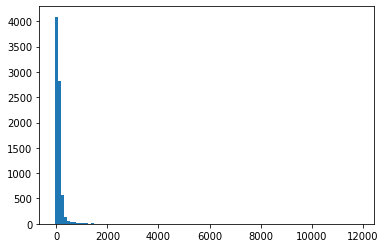

In [14]:
df['_arpu'].describe()
plt.hist(df['_arpu'],bins = 100)

In [15]:
# df['arpu_null'] = df['_arpu'].isnull().astype(np.int32)
df['arpu_high'] = (df['_arpu']>500).astype(np.int32)

In [16]:
df['_arpu'].fillna(0,inplace = True)

In [17]:
df[cat_features] = df[cat_features].fillna('缺失')

In [18]:
df = pd.concat([df,pd.get_dummies(df[cat_features])], axis = 1)

In [20]:
voc_df = pd.read_csv('./voc_submit.csv', encoding = 'utf-8')
sms_df = pd.read_csv('./sms_submit.csv', encoding = 'utf-8')
app_df = pd.read_csv('./app_submit.csv', encoding = 'utf-8')

In [24]:
df = pd.merge(df, voc_df, how = 'left',on = 'phone_no_m')
df = pd.merge(df, sms_df, how = 'left',on = 'phone_no_m')
df = pd.merge(df, app_df, how = 'left',on = 'phone_no_m')

In [26]:
df[['call_dur_mean','call_type_1_count','call_type_2_count','call_type_3_count','call_called_rate','sms_1_count','sms_2_count','mout_min_rate']] = df[['call_dur_mean','call_type_1_count','call_type_2_count','call_type_3_count','call_called_rate','sms_1_count','sms_2_count','mout_min_rate']].fillna(0)

In [27]:
df.drop(cat_features + ['phone_no_m'],axis = 1,inplace = True)


In [28]:
# df[['_arpu','sms_1_count','sms_2_count','flow','call_dur_mean','call_type_1_count','call_type_2_count','call_type_3_count']] = np.log1p(df[['_arpu','sms_1_count','sms_2_count','flow','call_dur_mean','call_type_1_count','call_type_2_count','call_type_3_count']])

In [29]:
df['flow_null'] = (df['flow']==0).astype(np.int32)

In [30]:
df['sms_count'].fillna(1000,inplace=True)

In [31]:
from sklearn.preprocessing import KBinsDiscretizer
df['_arpu']= KBinsDiscretizer(n_bins=50,encode = 'ordinal').fit_transform(np.array(df['_arpu']).reshape(-1,1))
df[['sms_1_count','sms_2_count','sms_opposite_count','flow']] = df[['sms_1_count','sms_2_count','sms_opposite_count','flow']].fillna(0)
df['sms_1_count'] = KBinsDiscretizer(n_bins = 50,encode = 'ordinal').fit_transform(np.array(df['sms_1_count']).reshape(-1,1))
df['sms_2_count'] = KBinsDiscretizer(n_bins = 50,encode = 'ordinal').fit_transform(np.array(df['sms_2_count']).reshape(-1,1))
df['sms_count'] = KBinsDiscretizer(n_bins = 50,encode = 'ordinal').fit_transform(np.array(df['sms_count']).reshape(-1,1))
df['app_count'] = KBinsDiscretizer(n_bins = 50,encode = 'ordinal').fit_transform(np.array(df['app_count']).reshape(-1,1))
df['sms_opposite_count'] = KBinsDiscretizer(n_bins = 50,encode = 'ordinal').fit_transform(np.array(df['sms_opposite_count']).reshape(-1,1))
df['flow'] = KBinsDiscretizer(n_bins = 50, encode='ordinal').fit_transform(np.array(df['flow']).reshape(-1,1))

F:\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
F:\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
F:\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
F:\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
F:\Anaconda3\lib\site-pa

In [34]:
null_columns = df.columns[df.isnull().sum()!=0]
for column in null_columns:
    df[column].fillna(np.mean(df[column]), inplace=True)

In [35]:
train_df = df.iloc[:len(train_df),:]
test_df = df.iloc[len(train_df):,:]

In [36]:
## 特征工程之后的训练集和测试集导出
train_df.to_csv('./train_df.csv', encoding='utf-8',index = None)
test_df.to_csv('./test_df.csv', encoding='utf-8', index = None)

In [37]:
train_df['label'].describe()

count    6106.000000
mean        0.321323
std         0.467023
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: label, dtype: float64

In [39]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [40]:
train_x, val_x, train_y, val_y = train_test_split(train_df.drop(['label'], axis = 1), train_df['label'], test_size = 0.2, random_state = 777)

In [41]:
dtrain = xgb.DMatrix(train_x,label=train_y)
dval =xgb.DMatrix(val_x, label = val_y)

In [42]:
params = {'booster':'gbtree',
         'objective':'binary:logistic',
         'eval_metric':'auc',
         'gamma':0.1,
         'min_child_weight':2,
         'max_depth':8,
         'lambda':4,
         'subsample':0.8,
         'colsample_bytree':0.9,
         'colsample_bylevel':0.7,
         'eta':0.01,
         'tree_method':'exact',
         'seed':72,
         'nthread':4,
         'scale_pos_weight': 2
         }

In [43]:
watchlist = [(dtrain,'train'),(dval, 'eval')]

In [44]:
model = xgb.train(params,dtrain,evals = watchlist,early_stopping_rounds=500,num_boost_round=10000)

[0]	train-auc:0.95546	eval-auc:0.93602
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 500 rounds.
[1]	train-auc:0.96944	eval-auc:0.94671
[2]	train-auc:0.97368	eval-auc:0.95057
[3]	train-auc:0.97635	eval-auc:0.95480
[4]	train-auc:0.97880	eval-auc:0.95414
[5]	train-auc:0.97922	eval-auc:0.95363
[6]	train-auc:0.97997	eval-auc:0.95434
[7]	train-auc:0.98064	eval-auc:0.95541
[8]	train-auc:0.98092	eval-auc:0.95687
[9]	train-auc:0.98075	eval-auc:0.95708
[10]	train-auc:0.98088	eval-auc:0.95898
[11]	train-auc:0.98122	eval-auc:0.95870
[12]	train-auc:0.98133	eval-auc:0.95930
[13]	train-auc:0.98137	eval-auc:0.95871
[14]	train-auc:0.98160	eval-auc:0.95833
[15]	train-auc:0.98171	eval-auc:0.95823
[16]	train-auc:0.98165	eval-auc:0.95843
[17]	train-auc:0.98174	eval-auc:0.95824
[18]	train-auc:0.98194	eval-auc:0.95794
[19]	train-auc:0.98191	eval-auc:0.95798
[20]	train-auc:0.98225	eval-auc:0.95779
[21]	train-auc:0.98231	eval-

[200]	train-auc:0.99262	eval-auc:0.96201
[201]	train-auc:0.99266	eval-auc:0.96205
[202]	train-auc:0.99273	eval-auc:0.96209
[203]	train-auc:0.99272	eval-auc:0.96203
[204]	train-auc:0.99277	eval-auc:0.96205
[205]	train-auc:0.99282	eval-auc:0.96204
[206]	train-auc:0.99287	eval-auc:0.96212
[207]	train-auc:0.99294	eval-auc:0.96216
[208]	train-auc:0.99306	eval-auc:0.96211
[209]	train-auc:0.99306	eval-auc:0.96211
[210]	train-auc:0.99306	eval-auc:0.96205
[211]	train-auc:0.99312	eval-auc:0.96213
[212]	train-auc:0.99316	eval-auc:0.96206
[213]	train-auc:0.99324	eval-auc:0.96218
[214]	train-auc:0.99327	eval-auc:0.96224
[215]	train-auc:0.99334	eval-auc:0.96221
[216]	train-auc:0.99336	eval-auc:0.96223
[217]	train-auc:0.99336	eval-auc:0.96221
[218]	train-auc:0.99340	eval-auc:0.96222
[219]	train-auc:0.99340	eval-auc:0.96225
[220]	train-auc:0.99346	eval-auc:0.96221
[221]	train-auc:0.99347	eval-auc:0.96244
[222]	train-auc:0.99354	eval-auc:0.96242
[223]	train-auc:0.99359	eval-auc:0.96246
[224]	train-auc:

[400]	train-auc:0.99812	eval-auc:0.96286
[401]	train-auc:0.99813	eval-auc:0.96292
[402]	train-auc:0.99815	eval-auc:0.96291
[403]	train-auc:0.99817	eval-auc:0.96294
[404]	train-auc:0.99817	eval-auc:0.96292
[405]	train-auc:0.99819	eval-auc:0.96300
[406]	train-auc:0.99820	eval-auc:0.96297
[407]	train-auc:0.99822	eval-auc:0.96294
[408]	train-auc:0.99824	eval-auc:0.96298
[409]	train-auc:0.99826	eval-auc:0.96300
[410]	train-auc:0.99827	eval-auc:0.96302
[411]	train-auc:0.99829	eval-auc:0.96304
[412]	train-auc:0.99831	eval-auc:0.96302
[413]	train-auc:0.99833	eval-auc:0.96301
[414]	train-auc:0.99834	eval-auc:0.96305
[415]	train-auc:0.99835	eval-auc:0.96305
[416]	train-auc:0.99836	eval-auc:0.96307
[417]	train-auc:0.99839	eval-auc:0.96310
[418]	train-auc:0.99840	eval-auc:0.96311
[419]	train-auc:0.99842	eval-auc:0.96310
[420]	train-auc:0.99843	eval-auc:0.96306
[421]	train-auc:0.99845	eval-auc:0.96305
[422]	train-auc:0.99845	eval-auc:0.96304
[423]	train-auc:0.99847	eval-auc:0.96307
[424]	train-auc:

[600]	train-auc:0.99972	eval-auc:0.96288
[601]	train-auc:0.99973	eval-auc:0.96291
[602]	train-auc:0.99973	eval-auc:0.96288
[603]	train-auc:0.99973	eval-auc:0.96288
[604]	train-auc:0.99973	eval-auc:0.96289
[605]	train-auc:0.99974	eval-auc:0.96289
[606]	train-auc:0.99974	eval-auc:0.96290
[607]	train-auc:0.99974	eval-auc:0.96289
[608]	train-auc:0.99975	eval-auc:0.96297
[609]	train-auc:0.99975	eval-auc:0.96291
[610]	train-auc:0.99975	eval-auc:0.96288
[611]	train-auc:0.99976	eval-auc:0.96284
[612]	train-auc:0.99976	eval-auc:0.96290
[613]	train-auc:0.99976	eval-auc:0.96292
[614]	train-auc:0.99977	eval-auc:0.96288
[615]	train-auc:0.99977	eval-auc:0.96291
[616]	train-auc:0.99977	eval-auc:0.96297
[617]	train-auc:0.99977	eval-auc:0.96292
[618]	train-auc:0.99978	eval-auc:0.96289
[619]	train-auc:0.99978	eval-auc:0.96290
[620]	train-auc:0.99978	eval-auc:0.96290
[621]	train-auc:0.99979	eval-auc:0.96289
[622]	train-auc:0.99979	eval-auc:0.96291
[623]	train-auc:0.99979	eval-auc:0.96291
[624]	train-auc:

[800]	train-auc:0.99998	eval-auc:0.96320
[801]	train-auc:0.99998	eval-auc:0.96326
[802]	train-auc:0.99998	eval-auc:0.96325
[803]	train-auc:0.99998	eval-auc:0.96323
[804]	train-auc:0.99998	eval-auc:0.96327
[805]	train-auc:0.99998	eval-auc:0.96327
[806]	train-auc:0.99998	eval-auc:0.96325
[807]	train-auc:0.99998	eval-auc:0.96327
[808]	train-auc:0.99998	eval-auc:0.96326
[809]	train-auc:0.99998	eval-auc:0.96323
[810]	train-auc:0.99998	eval-auc:0.96322
[811]	train-auc:0.99998	eval-auc:0.96320
[812]	train-auc:0.99998	eval-auc:0.96323
[813]	train-auc:0.99998	eval-auc:0.96323
[814]	train-auc:0.99998	eval-auc:0.96320
[815]	train-auc:0.99998	eval-auc:0.96321
[816]	train-auc:0.99998	eval-auc:0.96316
[817]	train-auc:0.99998	eval-auc:0.96313
[818]	train-auc:0.99998	eval-auc:0.96313
[819]	train-auc:0.99998	eval-auc:0.96313
[820]	train-auc:0.99998	eval-auc:0.96314
[821]	train-auc:0.99998	eval-auc:0.96312
[822]	train-auc:0.99998	eval-auc:0.96313
[823]	train-auc:0.99998	eval-auc:0.96314
[824]	train-auc:

In [62]:
y_pred = model.predict(dval)
y_pred = (y_pred >=0.52) * 1

In [63]:
metrics.f1_score(val_y,y_pred)

0.9025069637883008

In [64]:
test_df.drop(['label'], axis = 1,inplace = True)

F:\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [66]:
dtest = xgb.DMatrix(test_df)

In [68]:
y_pred = model.predict(dtest)
y_pred = (y_pred >=0.52) * 1

In [69]:
y_pred = pd.DataFrame(y_pred)
y_pred.to_csv('./xgb_submit.csv',encoding = 'utf-8')